# Other Clustering Approaches

In [3]:
import glob
import re
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

stats = glob.glob(
    "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/*stats.txt"
)
IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/pdam")


def parse_stats_file(file_path):
    df = []
    with open(file_path) as f:
        first_line = f.readline().strip()
        pval = float(first_line.split()[-2])
        tstat = float(first_line.split()[-1])
        for line in f:
            line = line.strip().split("\t")
            df.append(line[1:])
    return pval, tstat, pd.DataFrame(df)


def parse_stats_name(file_path):
    return re.match(
        "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_(.*)_stats.txt",
        file_path,
    ).group(1)


def get_clusters(file_path):
    clusters = []
    name = parse_stats_name(file_path)
    cfi_path = f"/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_{name}_clusters.txt"
    with open(cfi_path) as f:
        for line in f:
            clusters.append(line.strip().split("\t"))
    return clusters

In [20]:
stats = [
    i
    for i in stats
    if i
    != "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_stats.txt"
]
stats = [i for i in stats if "walkscan" not in i]

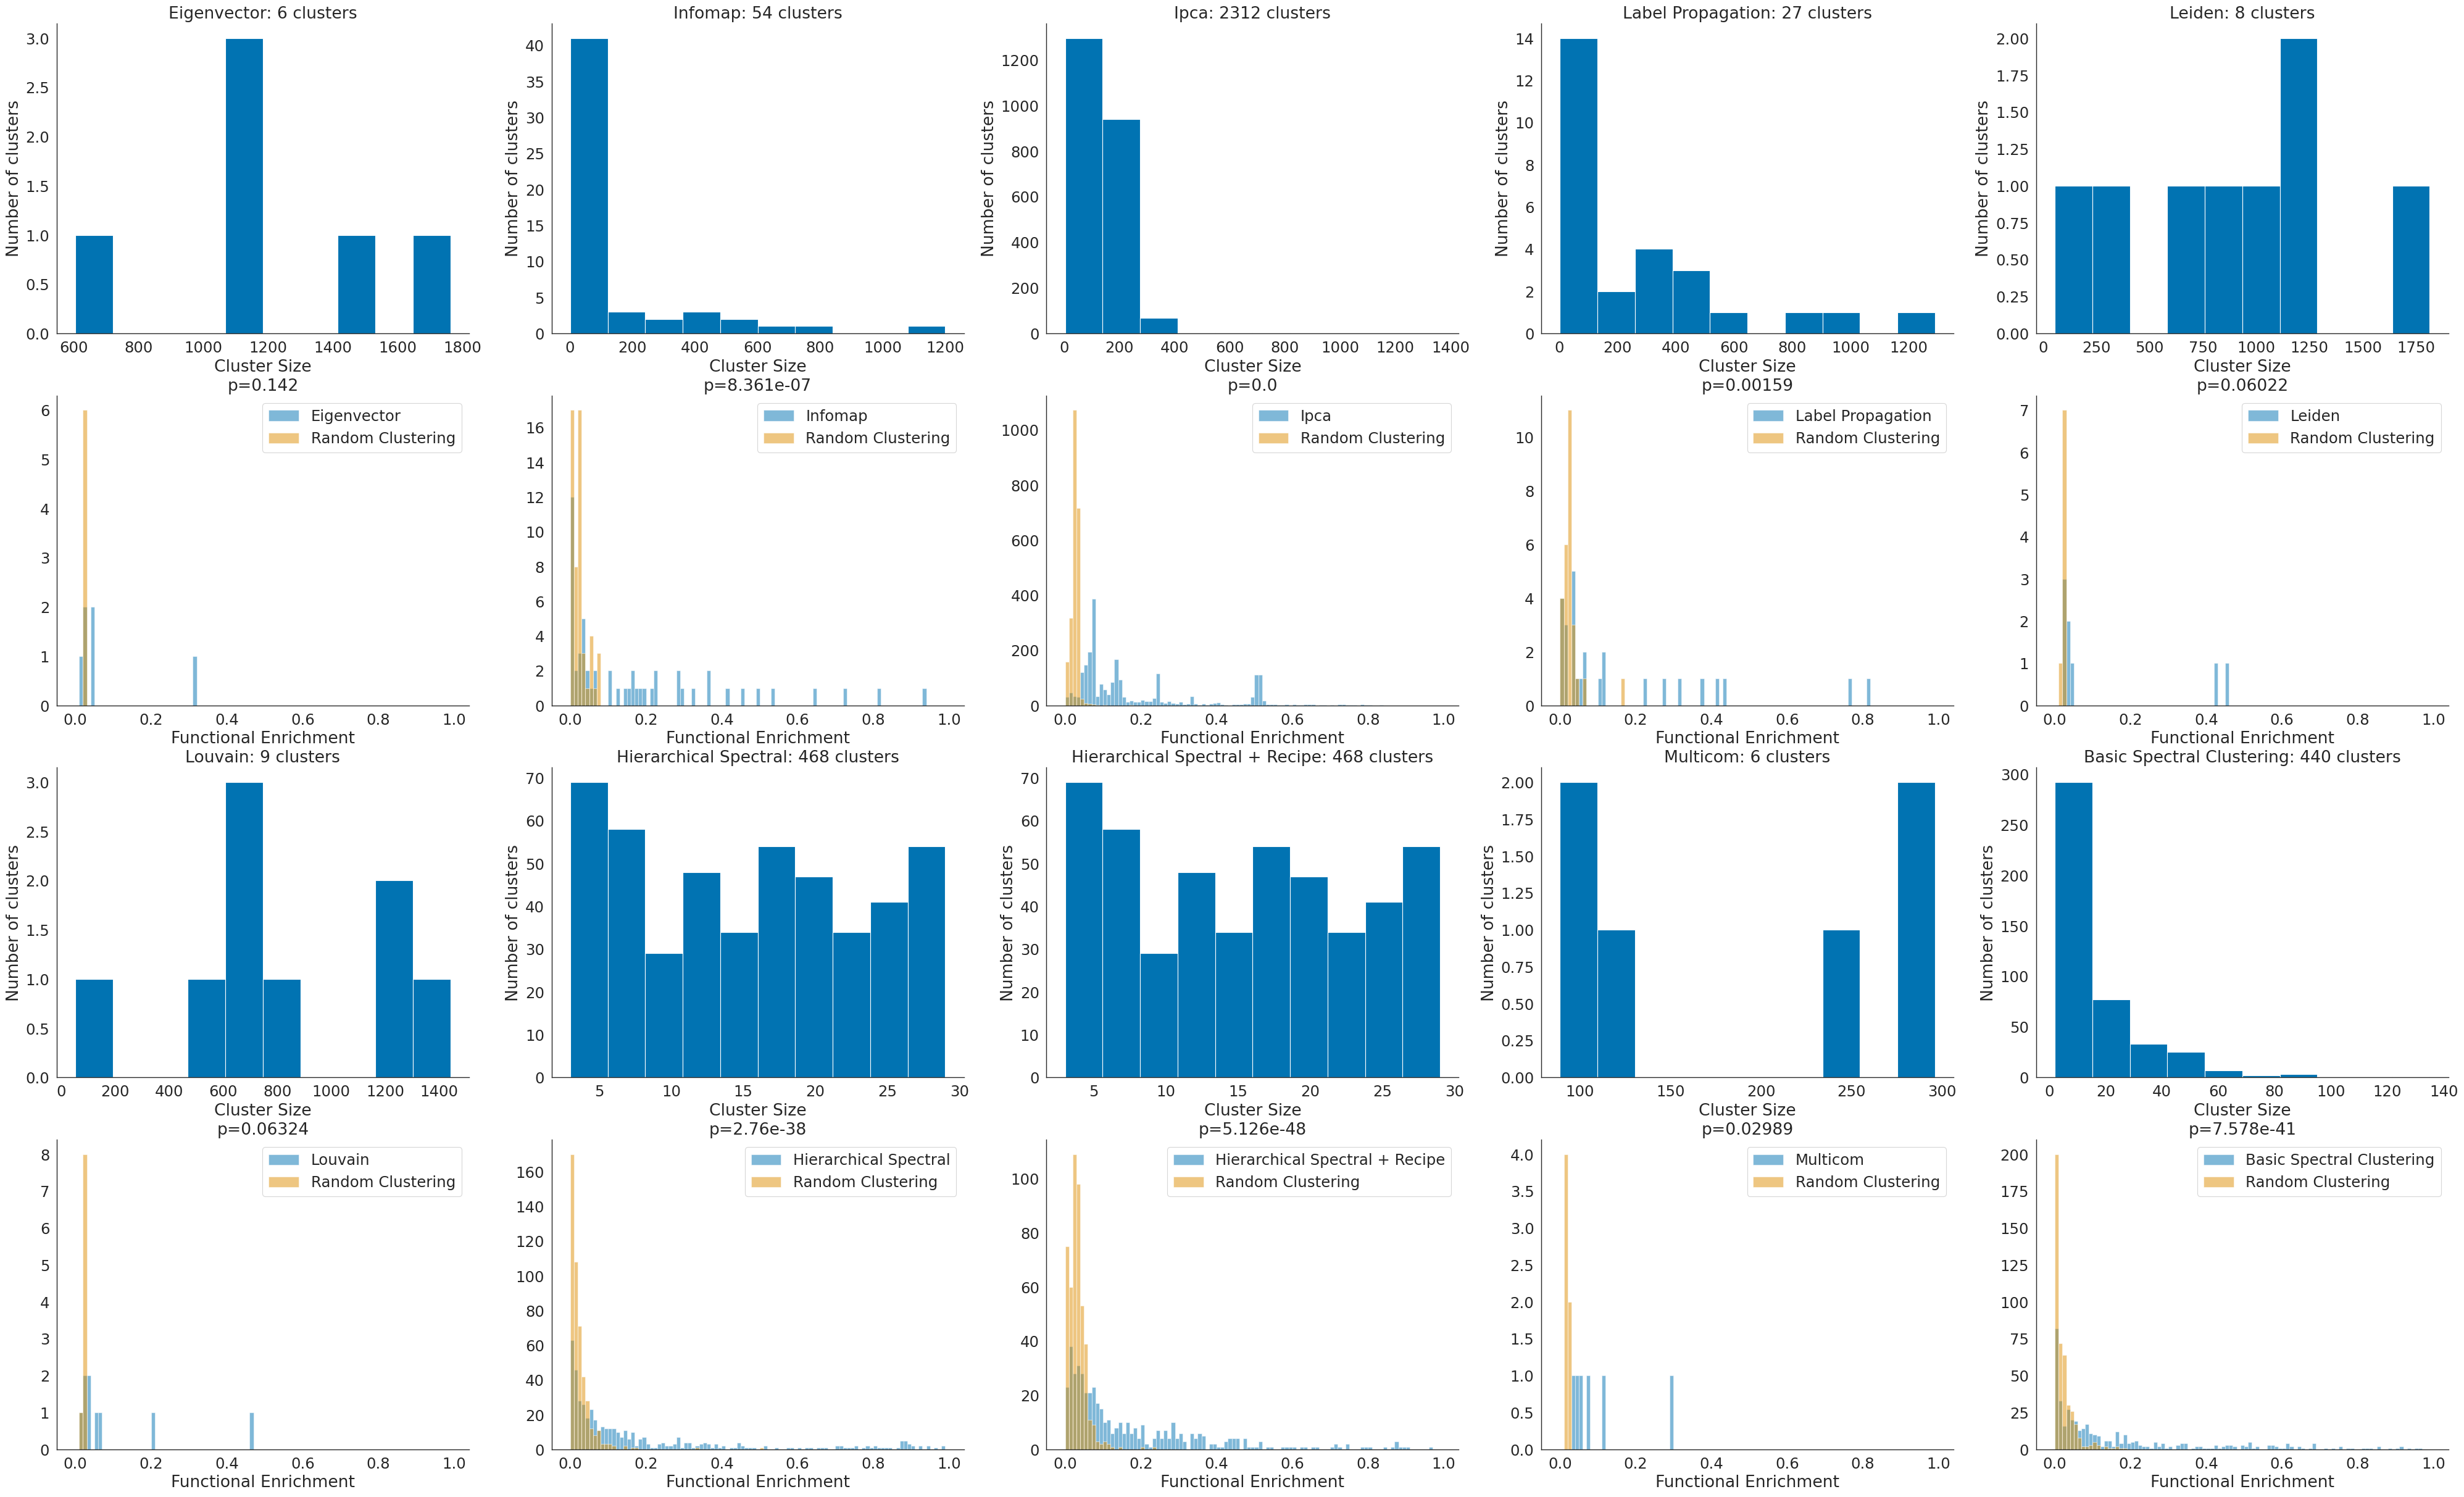

In [30]:
ax_columns = 5
# ax_rows = 2 * (len(stats) // ax_columns)
ax_rows = 4

sns.set_theme(style="white", palette="colorblind", context="paper", font_scale=2)
fig, ax = plt.subplots(ax_rows, ax_columns, figsize=(50, 30))
# plt.rcParams.update({"font.size": 16})

for i, fi in enumerate(sorted(stats)):
    row = (i // ax_columns) * 2
    column = i % ax_columns
    fi_stem = fi.split("/")[-1]

    try:
        name = parse_stats_name(fi)
        name = " ".join(name.split("_"))
        if name == "manual no recipe":
            name = "Hierarchical Spectral"
        elif name == "manual":
            name = "Hierarchical Spectral + ReCIPE"
        elif name == "r spectral clustering":
            name = "Basic Spectral Clustering"
        # print(row, column, name)
    except AttributeError:
        ax[row, column].set_title(f"Error parsing\n{fi_stem}")
        # print(f"{row} {column} {fi_stem}")
        continue
    pval, tstat, df = parse_stats_file(fi)
    # print(f"{name}: {pval}, {tstat}")

    try:
        clusters = get_clusters(fi)
        lengths = np.array([len(c) for c in clusters])
        med_length = np.median(lengths)
        min_length = np.min(lengths)
        max_length = np.max(lengths)
        n_clusters = len(clusters)
        ax[row, column].hist(lengths)
        ax[row, column].set_xlabel("Cluster Size")
        ax[row, column].set_ylabel("Number of clusters")
        ax[row, column].set_title(
            f"{name.title()}: {n_clusters} clusters"  # ,\n min:{min_length}, med:{med_length}, max:{max_length}"
        )

    except FileNotFoundError:
        ax[row, column].set_title(f"{name}: No cluster file")

    method_scores = df[df[0] != "Random Clustering"][1].astype(float)
    random_scores = df[df[0] == "Random Clustering"][1].astype(float)
    ax[row + 1, column].hist(
        method_scores, bins=np.arange(0, 1, 0.01), label=name.title(), alpha=0.5
    )
    ax[row + 1, column].hist(
        random_scores, bins=np.arange(0, 1, 0.01), label="Random Clustering", alpha=0.5
    )
    ax[row + 1, column].set_title(f"p={pval}")  # , t={tstat}")
    ax[row + 1, column].set_xlabel("Functional Enrichment")
    ax[row + 1, column].legend()
# plt.savefig(
# IMG_DIR / "alternate_clustering_comparison.png", bbox_inches="tight", dpi=300
# )
sns.despine()
plt.show()

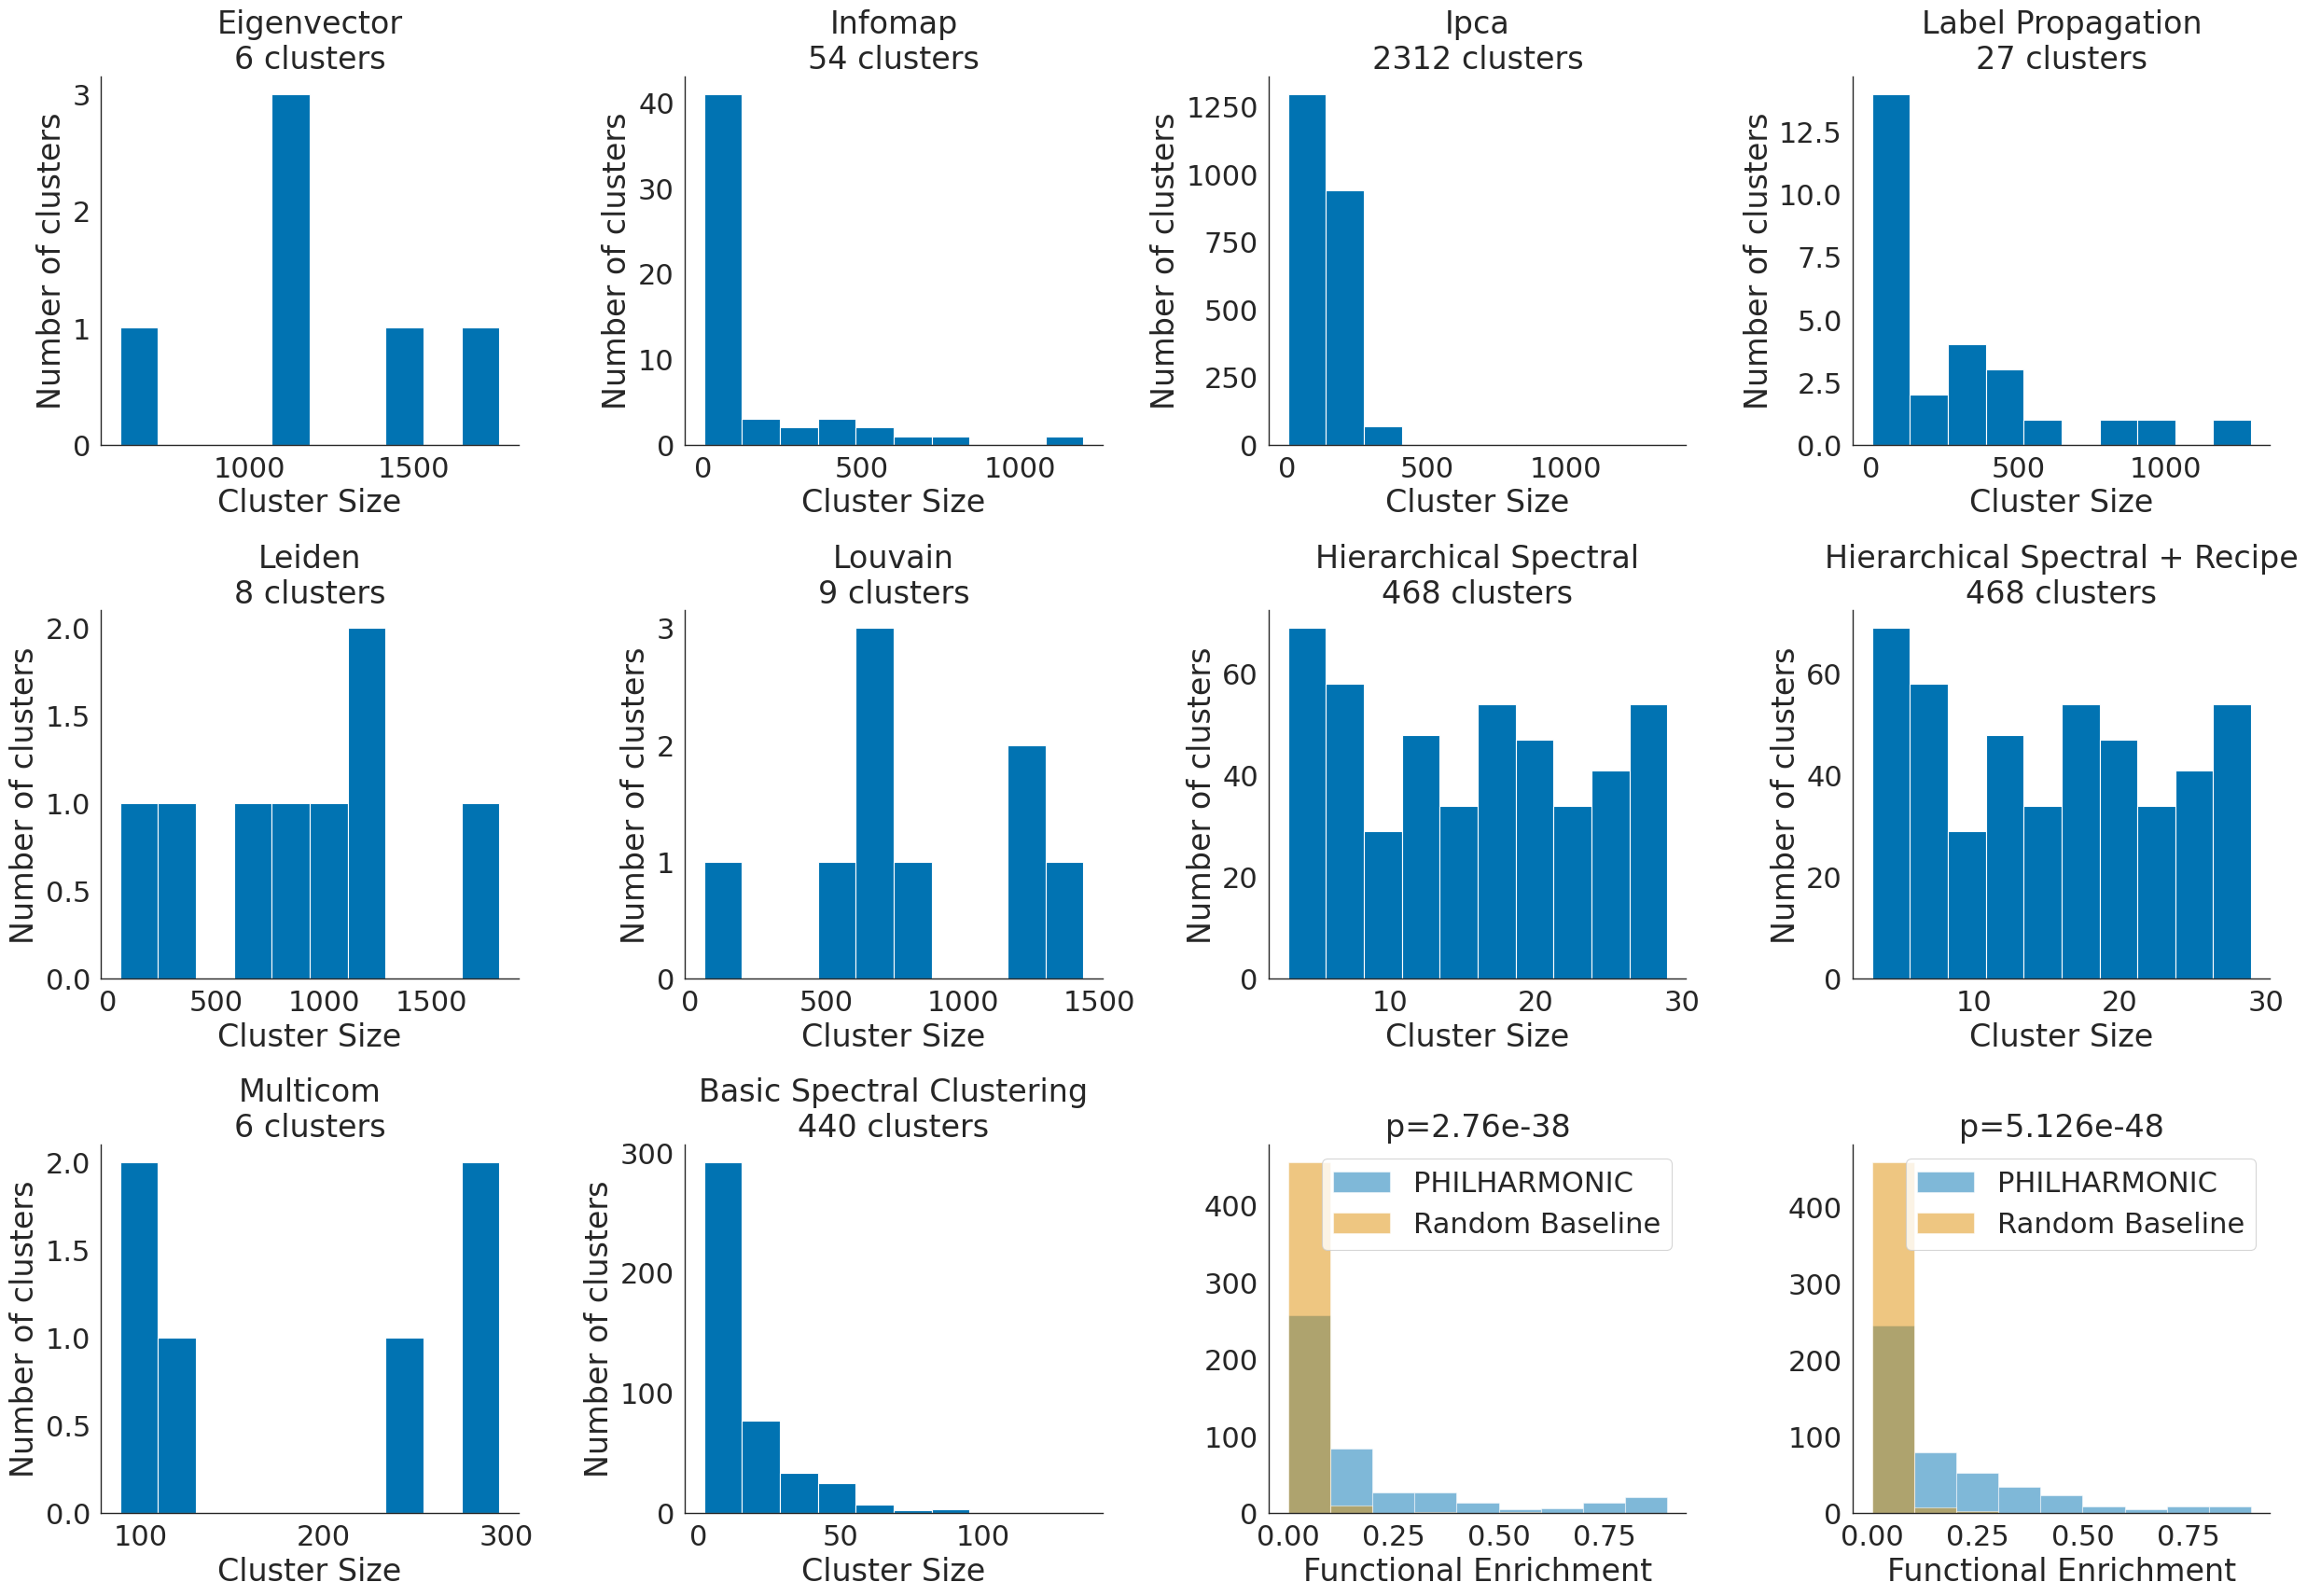

In [58]:
ax_columns = 4
# ax_rows = 2 * (len(stats) // ax_columns)
ax_rows = 3

sns.set_theme(style="white", palette="colorblind", context="paper", font_scale=2.5)
plt.rcParams["svg.fonttype"] = "none"
fig, ax = plt.subplots(ax_rows, ax_columns, figsize=(30, 20))
# plt.rcParams.update({"font.size": 16})

for i, fi in enumerate(sorted(stats)):
    row = i // ax_columns
    column = i % ax_columns
    fi_stem = fi.split("/")[-1]

    try:
        name = parse_stats_name(fi)
        name = " ".join(name.split("_"))
        if name == "manual no recipe":
            name = "Hierarchical Spectral"
        elif name == "manual":
            name = "Hierarchical Spectral + ReCIPE"
        elif name == "r spectral clustering":
            name = "Basic Spectral Clustering"
        # print(row, column, name)
    except AttributeError:
        ax[row, column].set_title(f"Error parsing\n{fi_stem}")
        # print(f"{row} {column} {fi_stem}")
        continue
    pval, tstat, df = parse_stats_file(fi)
    # print(f"{name}: {pval}, {tstat}")

    try:
        clusters = get_clusters(fi)
        lengths = np.array([len(c) for c in clusters])
        med_length = np.median(lengths)
        min_length = np.min(lengths)
        max_length = np.max(lengths)
        n_clusters = len(clusters)
        ax[row, column].hist(lengths)
        ax[row, column].set_xlabel("Cluster Size")
        ax[row, column].set_ylabel("Number of clusters")
        ax[row, column].set_title(
            f"{name.title()}\n{n_clusters} clusters"  # ,\n min:{min_length}, med:{med_length}, max:{max_length}"
        )

    except FileNotFoundError:
        ax[row, column].set_title(f"{name}: No cluster file")

    if name == "Hierarchical Spectral" or name == "Hierarchical Spectral + ReCIPE":
        method_scores = df[df[0] != "Random Clustering"][1].astype(float)
        random_scores = df[df[0] == "Random Clustering"][1].astype(float)
        ax[row + 1, column].hist(
            method_scores, bins=np.arange(0, 1, 0.1), label="PHILHARMONIC", alpha=0.5
        )
        ax[row + 1, column].hist(
            random_scores, bins=np.arange(0, 1, 0.1), label="Random Baseline", alpha=0.5
        )
        ax[row + 1, column].set_title(f"p={pval}")
        ax[row + 1, column].set_xlabel("Functional Enrichment")
        ax[row + 1, column].legend()

    # method_scores = df[df[0] != "Random Clustering"][1].astype(float)
    # random_scores = df[df[0] == "Random Clustering"][1].astype(float)
    # ax[row + 1, column].hist(
    #     method_scores, bins=np.arange(0, 1, 0.01), label=name.title(), alpha=0.5
    # )
    # ax[row + 1, column].hist(
    #     random_scores, bins=np.arange(0, 1, 0.01), label="Random Clustering", alpha=0.5
    # )
    # ax[row + 1, column].set_title(f"p={pval}")#, t={tstat}")
    # ax[row + 1, column].set_xlabel("Functional Enrichment")
    # ax[row + 1, column].legend()
# plt.savefig(
# IMG_DIR / "alternate_clustering_comparison.png", bbox_inches="tight", dpi=300
# )
plt.subplots_adjust(hspace=0.45, wspace=0.4)
sns.despine()
plt.savefig(
    IMG_DIR / "alternate_clustering_comparison_simple.svg", bbox_inches="tight", dpi=300
)
plt.show()

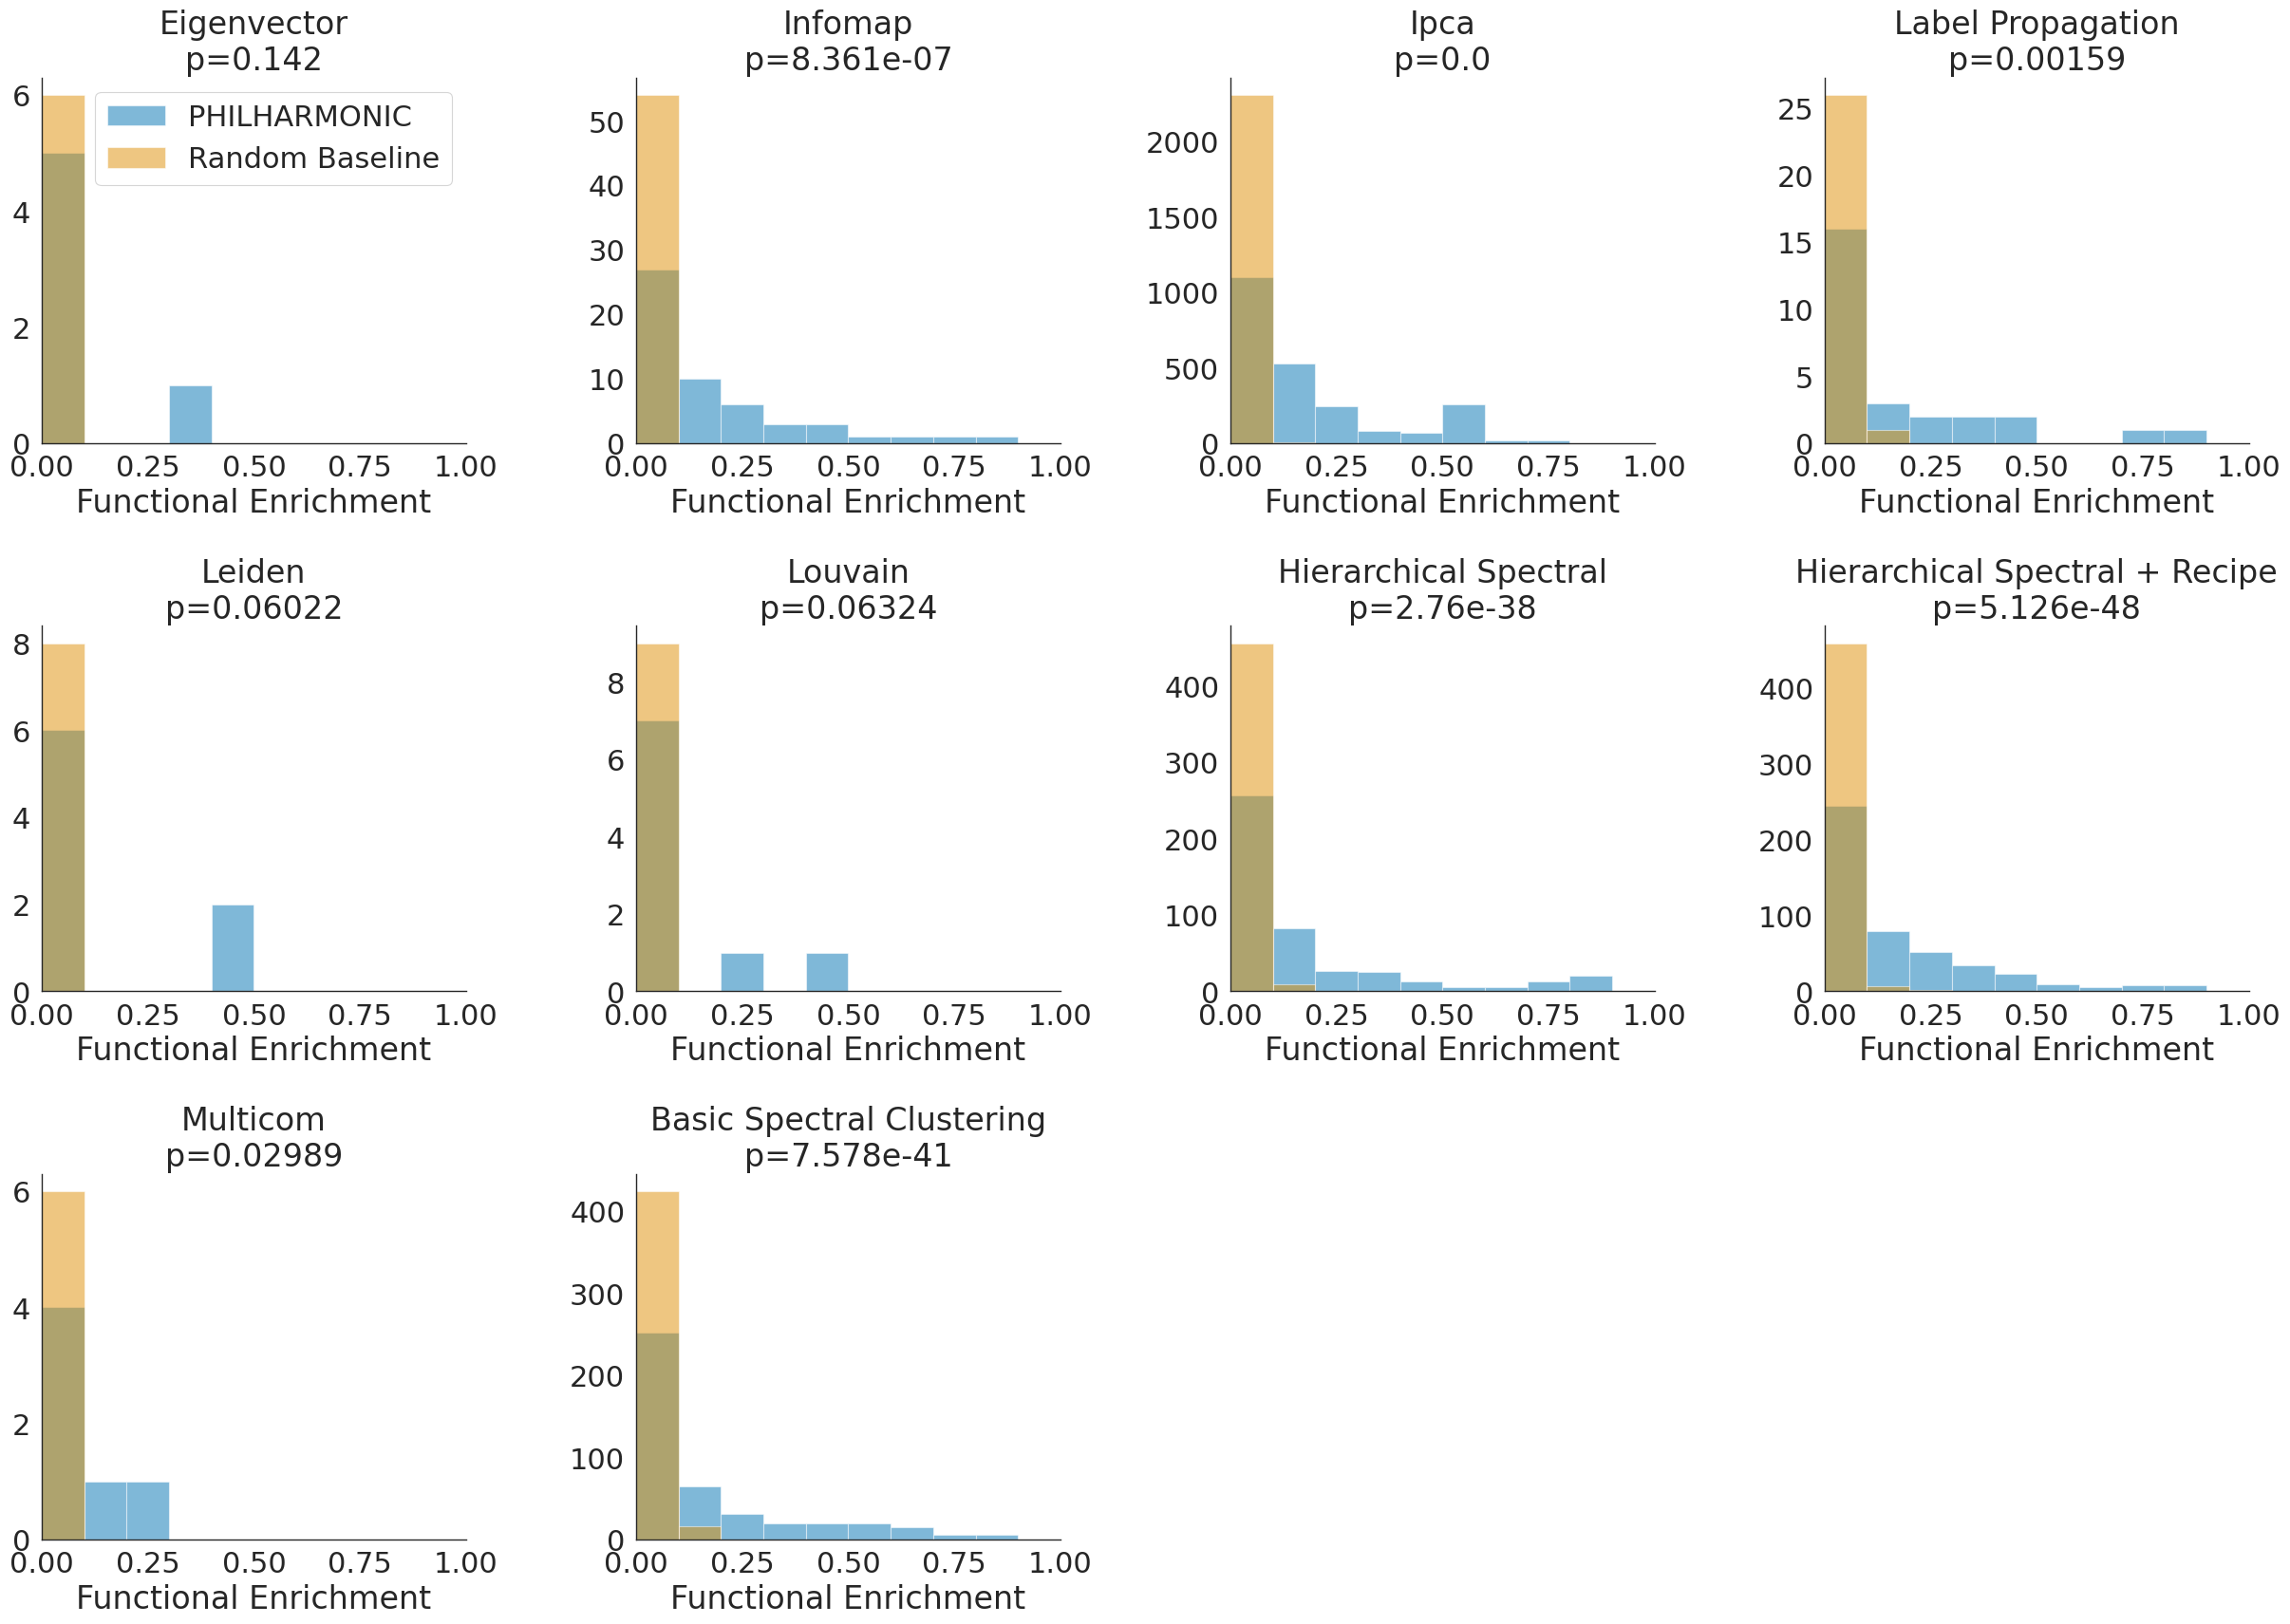

In [ ]:
ax_columns = 4
# ax_rows = 2 * (len(stats) // ax_columns)
ax_rows = 3

sns.set_theme(style="white", palette="colorblind", context="paper", font_scale=2.5)
plt.rcParams["svg.fonttype"] = "none"
fig, ax = plt.subplots(ax_rows, ax_columns, figsize=(30, 20))
# plt.rcParams.update({"font.size": 16})

for i, fi in enumerate(sorted(stats)):
    row = i // ax_columns
    column = i % ax_columns
    fi_stem = fi.split("/")[-1]

    try:
        name = parse_stats_name(fi)
        name = " ".join(name.split("_"))
        if name == "manual no recipe":
            name = "Hierarchical Spectral"
        elif name == "manual":
            name = "Hierarchical Spectral + ReCIPE"
        elif name == "r spectral clustering":
            name = "Basic Spectral Clustering"
        # print(row, column, name)
    except AttributeError:
        ax[row, column].set_title(f"Error parsing\n{fi_stem}")
        # print(f"{row} {column} {fi_stem}")
        continue
    pval, tstat, df = parse_stats_file(fi)
    # print(f"{name}: {pval}, {tstat}")

    # try:
    # clusters = get_clusters(fi)
    # lengths = np.array([len(c) for c in clusters])
    # med_length = np.median(lengths)
    # min_length = np.min(lengths)
    # max_length = np.max(lengths)
    # n_clusters = len(clusters)
    # ax[row, column].hist(lengths)
    # ax[row, column].set_xlabel("Cluster Size")
    # ax[row, column].set_ylabel("Number of clusters")
    # ax[row, column].set_title(
    #     f"{name.title()}\n{n_clusters} clusters" #,\n min:{min_length}, med:{med_length}, max:{max_length}"
    # )

    # except FileNotFoundError:
    #     ax[row, column].set_title(f"{name}: No cluster file")

    method_scores = df[df[0] != "Random Clustering"][1].astype(float)
    random_scores = df[df[0] == "Random Clustering"][1].astype(float)
    ax[row, column].hist(
        method_scores, bins=np.arange(0, 1, 0.1), label="PHILHARMONIC", alpha=0.5
    )
    ax[row, column].hist(
        random_scores, bins=np.arange(0, 1, 0.1), label="Random Baseline", alpha=0.5
    )
    ax[row, column].set_title(f"{name.title()}\np={pval}")
    ax[row, column].set_xlabel("Functional Enrichment")
    ax[row, column].set_xlim(0, 1)
    if (row == 0) and (column == 0):
        ax[row, column].legend()

    # method_scores = df[df[0] != "Random Clustering"][1].astype(float)
    # random_scores = df[df[0] == "Random Clustering"][1].astype(float)
    # ax[row + 1, column].hist(
    #     method_scores, bins=np.arange(0, 1, 0.01), label=name.title(), alpha=0.5
    # )
    # ax[row + 1, column].hist(
    #     random_scores, bins=np.arange(0, 1, 0.01), label="Random Clustering", alpha=0.5
    # )
    # ax[row + 1, column].set_title(f"p={pval}")#, t={tstat}")
    # ax[row + 1, column].set_xlabel("Functional Enrichment")
    # ax[row + 1, column].legend()
# plt.savefig(
# IMG_DIR / "alternate_clustering_comparison.png", bbox_inches="tight", dpi=300
# )

ax[-1, -1].axis("off")
ax[-1, -2].axis("off")
plt.subplots_adjust(hspace=0.5, wspace=0.4)
sns.despine()
plt.savefig(
    IMG_DIR / "alternate_clustering_enrichments.png", bbox_inches="tight", dpi=300
)
plt.show()

---

# Hyperparameter Robustness

In [4]:
import glob
from pathlib import Path

import matplotlib.pyplot as plt
import yaml

config_file = Path(
    "/mnt/home/ssledzieski/Projects/philharmonic-experiments/snakemake_configs/20241219-pdam-paramSweep_v0.8.2.yml"
)
results_dir = Path(
    "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20241219-paramSweep"
)

config = yaml.safe_load(config_file.read_text())

In [5]:
config

{'run_name': 'ps',
 'work_dir': 'results/p_damicornis/20241219-paramSweep',
 'sequence_path': '/mnt/ceph/users/ssledzieski/philharmonic/p_damicornis/pdam_proteins.fasta',
 'go_filter_path': './code/assets/go_filter.txt',
 'use_llm': True,
 'seed': 6191998,
 'hmmscan': {'path': 'hmmscan', 'threads': 32},
 'dscript': {'path': 'dscript',
  'n_pairs': -1,
  'model': 'samsl/dscript_human_v1',
  'device': 0},
 'dsd': {'path': 'fastdsd', 't': 0.5, 'confidence': True},
 'clustering': {'init_k': [50, 100, 500],
  'min_cluster_size': [3, 10],
  'cluster_divisor': [5, 10, 20],
  'sparsity_thresh': '1e-5'},
 'recipe': {'lr': [0.1, 0.25],
  'cthresh': [0.25, 0.5, 0.75],
  'max_proteins': [10, 20, 50],
  'metric': 'degree'},
 'langchain': {'model': 'gpt-4o'}}

In [6]:
def parse_stats_name_params(file_path):
    params = re.match(
        r"/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20241219-paramSweep/ps_initk:(\d+)_mcs:(\d+)_cd:(\d+)_lr:(\d+.\d+)_cthresh:(\d+.\d+)_max:(\d+)_stats.txt",
        file_path,
    ).groups()
    name = f"initk:{params[0]}_mcs:{params[1]}_cd:{params[2]}_lr:{params[3]}_cthresh:{params[4]}_max:{params[5]}"
    params = [int(i) if i.isdigit() else float(i) for i in params]
    return name, params

In [7]:
ps_stats = glob.glob(str(results_dir / "*stats.txt"))

# print(f"Name\t\t\t\t\t\t\tP-value\t\tT-statistic")
results = []
for f in sorted(ps_stats):
    name, params = parse_stats_name_params(f)
    stat_pkg = parse_stats_file(f)
    # print(f"{name:50}\t{stat_pkg[0]:<10.3e}\t{stat_pkg[1]:<.3e}")
    results.append([name, *params, stat_pkg[0]])  # , stat_pkg[1]])
ps_results = pd.DataFrame(
    results,
    columns=[
        "Name",
        "clust:initk",
        "clust:mcs",
        "clust:divisor",
        "recipe:lr",
        "recipe:cthresh",
        "recipe:max",
        "pval",
    ],
)  # , "tstat"])

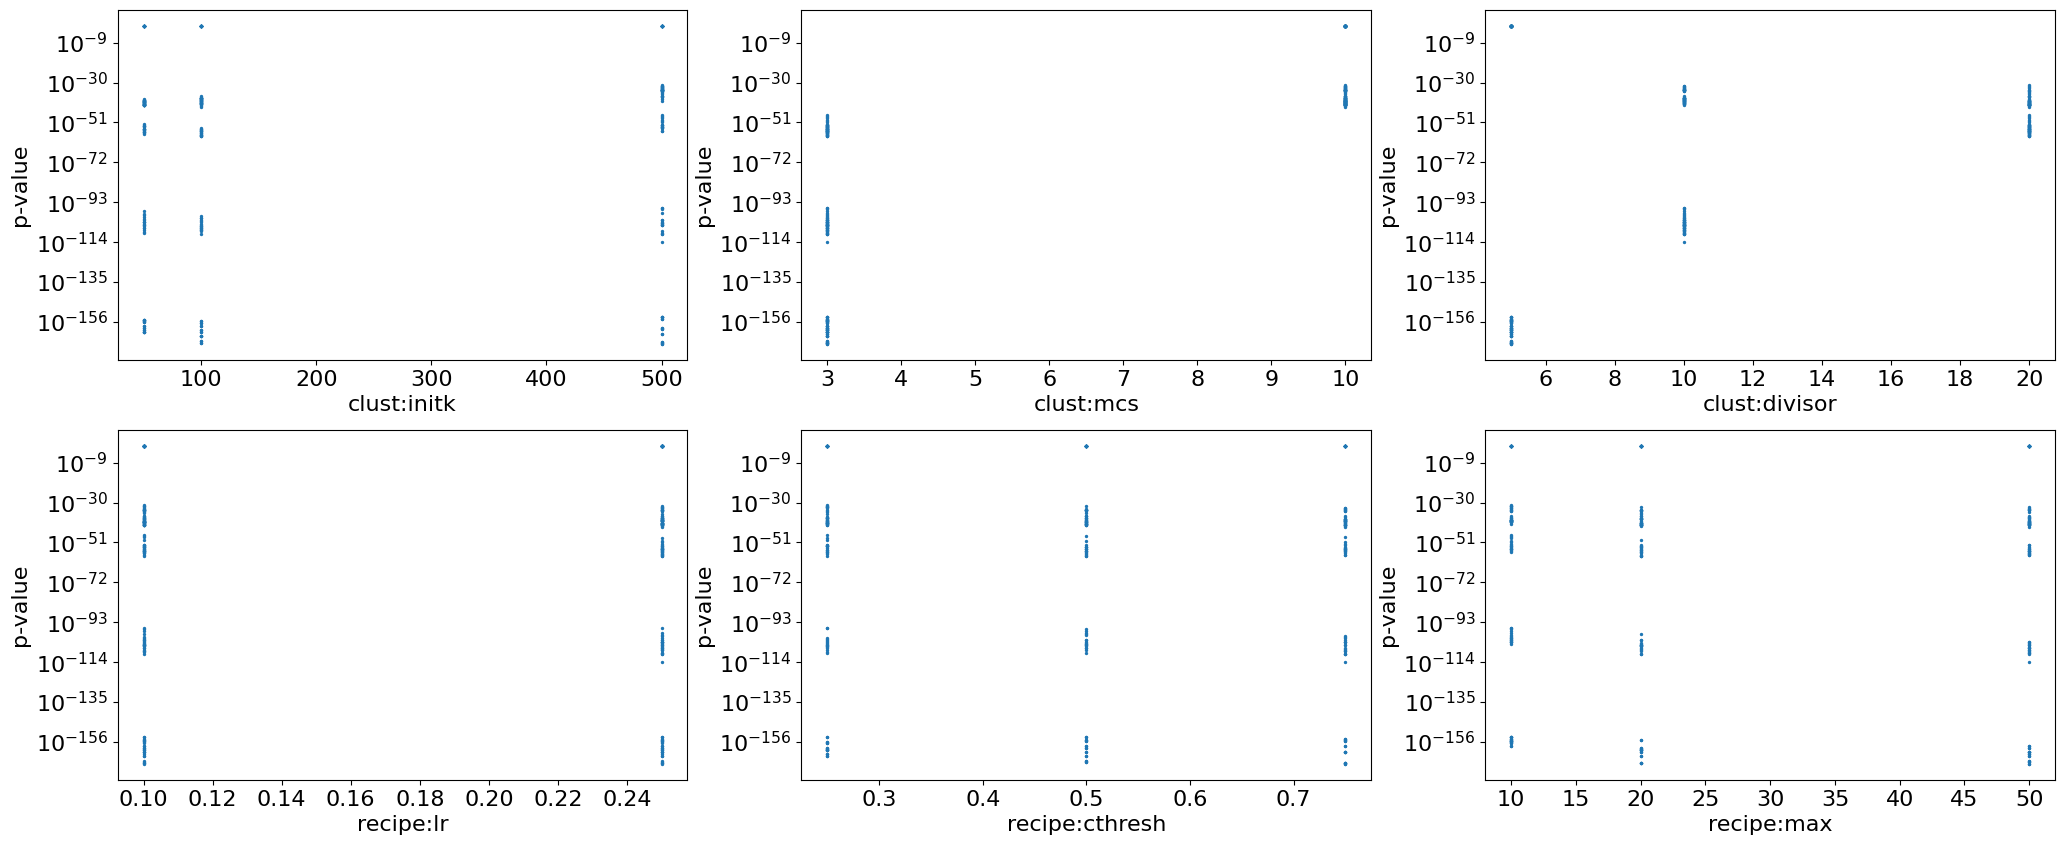

In [8]:
# plot linear relationship between each parameter and p-value
fig, ax = plt.subplots(2, 3, figsize=(25, 10))
plt.rcParams.update({"font.size": 12})

for i, param in enumerate(
    [
        "clust:initk",
        "clust:mcs",
        "clust:divisor",
        "recipe:lr",
        "recipe:cthresh",
        "recipe:max",
    ]
):
    ax_row = i // 3
    ax_col = i % 3
    ax[ax_row, ax_col].scatter(ps_results[param], ps_results["pval"], s=2)
    ax[ax_row, ax_col].set_xlabel(param)
    ax[ax_row, ax_col].set_ylabel("p-value")
    # -log10 p value for y axis
    ax[ax_row, ax_col].set_yscale("log")
plt.show()

# everything with initk = 1000 timed out

In [9]:
# get results with specific parameter values, -1 means it can be flexible
def get_results(initk=-1, mcs=-1, divisor=-1, lr=-1, cthresh=-1, max=-1):
    results = []
    for f in sorted(ps_stats):
        name, params = parse_stats_name_params(f)
        if (
            (initk == -1 or params[0] == initk)
            and (mcs == -1 or params[1] == mcs)
            and (divisor == -1 or params[2] == divisor)
            and (lr == -1 or params[3] == lr)
            and (cthresh == -1 or params[4] == cthresh)
            and (max == -1 or params[5] == max)
        ):
            stat_pkg = parse_stats_file(f)
            results.append([name, *params, stat_pkg[0]])  # , stat_pkg[1]])
    return pd.DataFrame(
        results,
        columns=[
            "Name",
            "clust:initk",
            "clust:mcs",
            "clust:divisor",
            "recipe:lr",
            "recipe:cthresh",
            "recipe:max",
            "pval",
        ],
    )  # , "tstat"])

In [10]:
subset_results = get_results(initk=500, mcs=10, divisor=5)
subset_results

,Name,clust:initk,clust:mcs,clust:divisor,recipe:lr,recipe:cthresh,recipe:max,pval
0,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.25_max:10,500,10,5,0.10,0.25,10,1.0
1,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.25_max:20,500,10,5,0.10,0.25,20,1.0
2,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.25_max:50,500,10,5,0.10,0.25,50,1.0
3,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.5_max:10,500,10,5,0.10,0.50,10,1.0
4,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.5_max:20,500,10,5,0.10,0.50,20,1.0
5,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.5_max:50,500,10,5,0.10,0.50,50,1.0
6,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.75_max:10,500,10,5,0.10,0.75,10,1.0
7,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.75_max:20,500,10,5,0.10,0.75,20,1.0
8,initk:500_mcs:10_cd:5_lr:0.1_cthresh:0.75_max:50,500,10,5,0.10,0.75,50,1.0
9,initk:500_mcs:10_cd:5_lr:0.25_cthresh:0.25_max:10,500,10,5,0.25,0.25,10,1.0


In [11]:
config

{'run_name': 'ps',
 'work_dir': 'results/p_damicornis/20241219-paramSweep',
 'sequence_path': '/mnt/ceph/users/ssledzieski/philharmonic/p_damicornis/pdam_proteins.fasta',
 'go_filter_path': './code/assets/go_filter.txt',
 'use_llm': True,
 'seed': 6191998,
 'hmmscan': {'path': 'hmmscan', 'threads': 32},
 'dscript': {'path': 'dscript',
  'n_pairs': -1,
  'model': 'samsl/dscript_human_v1',
  'device': 0},
 'dsd': {'path': 'fastdsd', 't': 0.5, 'confidence': True},
 'clustering': {'init_k': [50, 100, 500],
  'min_cluster_size': [3, 10],
  'cluster_divisor': [5, 10, 20],
  'sparsity_thresh': '1e-5'},
 'recipe': {'lr': [0.1, 0.25],
  'cthresh': [0.25, 0.5, 0.75],
  'max_proteins': [10, 20, 50],
  'metric': 'degree'},
 'langchain': {'model': 'gpt-4o'}}

In [14]:
all_results = get_results()
all_results.to_csv(IMG_DIR / "param_sweep_results.csv", index=False)
all_results

,Name,clust:initk,clust:mcs,clust:divisor,recipe:lr,recipe:cthresh,recipe:max,pval
0,initk:100_mcs:10_cd:10_lr:0.1_cthresh:0.25_max:10,100,10,10,0.10,0.25,10,2.776000e-38
1,initk:100_mcs:10_cd:10_lr:0.1_cthresh:0.25_max:20,100,10,10,0.10,0.25,20,1.005000e-38
2,initk:100_mcs:10_cd:10_lr:0.1_cthresh:0.25_max:50,100,10,10,0.10,0.25,50,1.024000e-38
3,initk:100_mcs:10_cd:10_lr:0.1_cthresh:0.5_max:10,100,10,10,0.10,0.50,10,5.306000e-38
4,initk:100_mcs:10_cd:10_lr:0.1_cthresh:0.5_max:20,100,10,10,0.10,0.50,20,3.364000e-39
...,...,...,...,...,...,...,...,...
319,initk:50_mcs:3_cd:5_lr:0.25_cthresh:0.5_max:20,50,3,5,0.25,0.50,20,3.762000e-162
320,initk:50_mcs:3_cd:5_lr:0.25_cthresh:0.5_max:50,50,3,5,0.25,0.50,50,8.750000e-159
321,initk:50_mcs:3_cd:5_lr:0.25_cthresh:0.75_max:10,50,3,5,0.25,0.75,10,2.262000e-156
322,initk:50_mcs:3_cd:5_lr:0.25_cthresh:0.75_max:20,50,3,5,0.25,0.75,20,6.723000e-156
